In [17]:
# Import libraries
import numpy as np
from scipy.linalg import eigh
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
# Set MD parameters
MDstep = 10000000 # 20 ns
interval = 10000
temp = 310
delta = 0.002

In [69]:
# Setup and run a MD simulation of alanine dipeptide
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

prmtop = AmberPrmtopFile('inputs/adip.prmtop')
inpcrd = AmberInpcrdFile('inputs/adip.inpcrd')
system = prmtop.createSystem(implicitSolvent=GBn, nonbondedCutoff=1 * nanometer,
        constraints=HBonds)
integrator = LangevinIntegrator(temp * kelvin, 1 / picosecond, delta * picoseconds)
simulation = Simulation(prmtop.topology, system, integrator)
simulation.context.setPositions(inpcrd.positions)
if inpcrd.boxVectors is not None:
    simulation.context.setPeriodicBoxVectors(*inpcrd.boxVectors)
simulation.minimizeEnergy()
#simulation.reporters.append(PDBReporter('outputs/output.pdb', interval)) # Fix it
simulation.reporters.append(DCDReporter('outputs/output.dcd', interval))
simulation.reporters.append(StateDataReporter('outputs/stdout', interval, step=True,
        potentialEnergy=True, temperature=True))
simulation.step(MDstep)

In [134]:
# Convert DCD format to PDB format, and write each frame to separate files.
traj = pt.load('outputs/output.dcd', top='inputs/adip.prmtop')
pt.write_traj('outputs/dcd_convert.pdb', traj, overwrite=True, options='multi')

In [135]:
# Visualize the conformations
#import pytraj as pt
#import nglview as nv

#traj = pt.load('outputs/output.dcd', top='inputs/adip.prmtop')
#view = nv.show_pytraj(traj)
#view.add_representation('licorice')
#view

In [177]:
#  Calculate potential energies from each frame
pe_list = []
unit = kilojoule / mole
for i in range(1, int(MDstep / interval)):
    filename = 'outputs/dcd_convert.pdb.%d' % i
    pdb = PDBFile(filename)
    simulation.context.setPositions(pdb.getPositions())
    state = simulation.context.getState(getEnergy=True)
    pe_list.append(state.getPotentialEnergy() / unit)
    print(i, state.getPotentialEnergy())

1 -84.22866821289062 kJ/mol
2 -97.75439453125 kJ/mol
3 -81.85601806640625 kJ/mol
4 -63.704742431640625 kJ/mol
5 -88.939697265625 kJ/mol
6 -93.98678588867188 kJ/mol
7 -81.44873046875 kJ/mol
8 -77.27877807617188 kJ/mol
9 -92.86862182617188 kJ/mol
10 -62.521820068359375 kJ/mol
11 -84.88723754882812 kJ/mol
12 -89.744873046875 kJ/mol
13 -64.16146850585938 kJ/mol
14 -89.10357666015625 kJ/mol
15 -64.72891235351562 kJ/mol
16 -73.22943115234375 kJ/mol
17 -84.16000366210938 kJ/mol
18 -76.09210205078125 kJ/mol
19 -89.75015258789062 kJ/mol
20 -87.37350463867188 kJ/mol
21 -78.02273559570312 kJ/mol
22 -94.59500122070312 kJ/mol
23 -74.5894775390625 kJ/mol
24 -74.93087768554688 kJ/mol
25 -75.63784790039062 kJ/mol
26 -86.32232666015625 kJ/mol
27 -80.7816162109375 kJ/mol
28 -89.1500244140625 kJ/mol
29 -82.16592407226562 kJ/mol
30 -82.58990478515625 kJ/mol
31 -91.78421020507812 kJ/mol
32 -66.51296997070312 kJ/mol
33 -70.35275268554688 kJ/mol
34 -70.39553833007812 kJ/mol
35 -90.4871826171875 kJ/mol
36 -11

293 -51.93646240234375 kJ/mol
294 -51.59271240234375 kJ/mol
295 -78.00836181640625 kJ/mol
296 -87.74044799804688 kJ/mol
297 -88.17050170898438 kJ/mol
298 -101.36422729492188 kJ/mol
299 -86.32327270507812 kJ/mol
300 -94.17544555664062 kJ/mol
301 -74.62680053710938 kJ/mol
302 -69.18106079101562 kJ/mol
303 -67.1517333984375 kJ/mol
304 -76.7933349609375 kJ/mol
305 -81.359375 kJ/mol
306 -62.08782958984375 kJ/mol
307 -54.066070556640625 kJ/mol
308 -69.7830810546875 kJ/mol
309 -96.84317016601562 kJ/mol
310 -79.85809326171875 kJ/mol
311 -83.1268310546875 kJ/mol
312 -78.1085205078125 kJ/mol
313 -93.11764526367188 kJ/mol
314 -91.873779296875 kJ/mol
315 -92.0205078125 kJ/mol
316 -91.85165405273438 kJ/mol
317 -97.60064697265625 kJ/mol
318 -81.14175415039062 kJ/mol
319 -79.87020874023438 kJ/mol
320 -70.2647705078125 kJ/mol
321 -73.43646240234375 kJ/mol
322 -85.53781127929688 kJ/mol
323 -55.8792724609375 kJ/mol
324 -59.053436279296875 kJ/mol
325 -70.385498046875 kJ/mol
326 -81.37680053710938 kJ/mol


594 -88.58160400390625 kJ/mol
595 -80.82858276367188 kJ/mol
596 -108.05303955078125 kJ/mol
597 -72.15469360351562 kJ/mol
598 -81.46871948242188 kJ/mol
599 -58.32415771484375 kJ/mol
600 -64.72482299804688 kJ/mol
601 -76.02850341796875 kJ/mol
602 -57.7548828125 kJ/mol
603 -83.43365478515625 kJ/mol
604 -56.593475341796875 kJ/mol
605 -56.02862548828125 kJ/mol
606 -87.92074584960938 kJ/mol
607 -78.53952026367188 kJ/mol
608 -78.69137573242188 kJ/mol
609 -65.935302734375 kJ/mol
610 -87.01034545898438 kJ/mol
611 -88.72048950195312 kJ/mol
612 -91.76974487304688 kJ/mol
613 -58.978546142578125 kJ/mol
614 -48.855316162109375 kJ/mol
615 -76.35379028320312 kJ/mol
616 -81.57980346679688 kJ/mol
617 -83.91995239257812 kJ/mol
618 -49.762176513671875 kJ/mol
619 -87.24136352539062 kJ/mol
620 -85.75115966796875 kJ/mol
621 -77.3448486328125 kJ/mol
622 -83.38046264648438 kJ/mol
623 -96.50094604492188 kJ/mol
624 -77.08502197265625 kJ/mol
625 -72.93853759765625 kJ/mol
626 -81.77798461914062 kJ/mol
627 -36.3262

891 -74.37811279296875 kJ/mol
892 -90.27261352539062 kJ/mol
893 -74.4114990234375 kJ/mol
894 -89.21737670898438 kJ/mol
895 -81.60299682617188 kJ/mol
896 -80.07098388671875 kJ/mol
897 -77.25564575195312 kJ/mol
898 -75.999267578125 kJ/mol
899 -66.25900268554688 kJ/mol
900 -72.37545776367188 kJ/mol
901 -92.67327880859375 kJ/mol
902 -79.24990844726562 kJ/mol
903 -49.590576171875 kJ/mol
904 -56.78887939453125 kJ/mol
905 -94.44259643554688 kJ/mol
906 -92.82846069335938 kJ/mol
907 -78.22119140625 kJ/mol
908 -78.35086059570312 kJ/mol
909 -76.03836059570312 kJ/mol
910 -52.507659912109375 kJ/mol
911 -83.62249755859375 kJ/mol
912 -74.25640869140625 kJ/mol
913 -94.39373779296875 kJ/mol
914 -83.63494873046875 kJ/mol
915 -90.21249389648438 kJ/mol
916 -85.4398193359375 kJ/mol
917 -98.51077270507812 kJ/mol
918 -71.83853149414062 kJ/mol
919 -58.140106201171875 kJ/mol
920 -60.66778564453125 kJ/mol
921 -92.41168212890625 kJ/mol
922 -75.08746337890625 kJ/mol
923 -53.483306884765625 kJ/mol
924 -89.47003173

Text(0,0.5,'Potential energy (kJ/mol)')

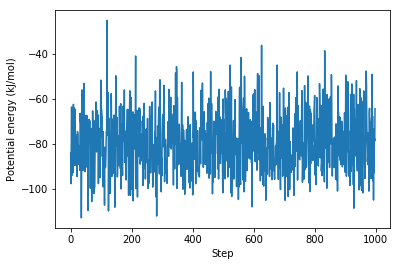

In [178]:
# Plot potential energies
# Time series
plt.plot(pe_list)
plt.xlabel('Step')
plt.ylabel('Potential energy (kJ/mol)')

Text(0.5,0,'Potential energy (kJ/mol)')

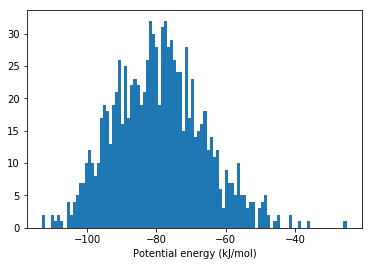

In [179]:
# Histgram
plt.hist(pe_list, bins=100)
plt.xlabel('Potential energy (kJ/mol)')

In [180]:
# Plot ramachandran plot
print(traj[500:])
print(set(res.name for res in traj.top.residues))

pytraj.Trajectory, 500 frames: 
Size: 0.000246 (GB)
<Topology: 22 atoms, 3 residues, 1 mols, non-PBC>
           
{'ALA', 'ACE', 'NME'}


In [181]:
phi, psi = pt.multidihedral(traj[500:], resrange=[1], dihedral_types='psi phi')
phi, psi

(<pytraj.array.DataArray: size=500, key=phi:2, dtype=float64, ndim=1> 
 values:
 [ -81.71021969  -58.82840616 -131.80255776 ...  -88.21457539  -83.38303873
   -65.83903761],
 <pytraj.array.DataArray: size=500, key=psi:2, dtype=float64, ndim=1> 
 values:
 [-31.19548495 151.12995483 167.51337443 ... 169.93841213  -8.12753906
  -24.57465773])

(-180, 180)

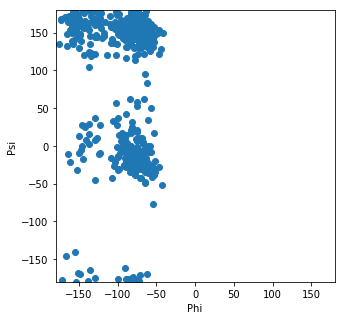

In [182]:
plt.figure(figsize=(5, 5))
plt.scatter(phi, psi)
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.xlim(-180, 180)
plt.ylim(-180, 180)